# Prediction Using unsupervised Machine Learning 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X = df.iloc[:,:].values
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Text(0.5, 1.0, 'The elbow method')

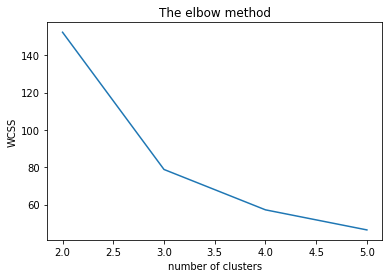

In [15]:
# Clustering
from sklearn.cluster import KMeans

lst = []

for i in range(2, 6):
    clf = KMeans(n_clusters=i, random_state=0, max_iter=100).fit(X)
    lst.append(clf.inertia_)
    
plt.plot(range(2,6),lst)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')

'3' is the optimum number of clusters

## Fitting the data

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=3, random_state=0)

# Predicting

In [22]:
y_kmeans = kmeans.predict(X)

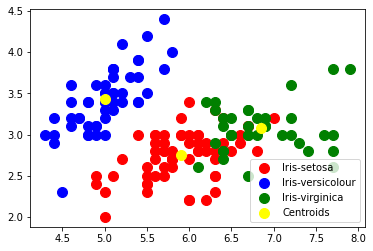

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()